<a href="https://colab.research.google.com/github/MarielGomezRan/G35.-Modulo-II-Modelos-Estad-sticos/blob/main/2.%20Variables%20Aleatorias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Módulo II: Técnicas Estadísticas
# 2. Variables Aleatorias
### **Alumna: Mariel Gómez Rangel**

**Introducción**

En este cuaderno se explicará qué son las variables aleatorias, abordando tanto las variables aleatorias discretas como las variables aleatorias continuas.

Asimismo, se incluirá la simulación de variables aleatorias, junto con conceptos importantes como la Función Generadora de Momentos, la Función Característica, la Ley de los Grandes Números y el Teorema Central del Límite.

Cada uno de estos temas se desarrollará acompañado de ejemplos prácticos que facilitarán la comprensión de los conceptos y su aplicación en distintos contextos estadísticos.

Una variable aleatoria es una función que asigna un valor numérico a cada resultado de un experimento aleatorio.

Se clasifica en:

*   Discretas: las cuales toman valores aislados.
*   Continuas: pueden tomar cualquier valor en un intervalo.



## 2.1 Variables Aleatorias Discretas

Una variable aleatoria discreta es una variable que puede tomar un número finito o infinito numerable de valores, es decir, que se puede contar.

Se asocia a un experimento aleatorio y a cada resultado posible se le asigna un valor numérico.

**Propiedades:**


1.   **No negatividad:** La probabilidad de cada valor posible debe ser mayor o igual a cero
$$P(X=x_i)\geq0$$
2.   **Suma igual a 1:** La suma de las probabilidades de todos los valores posibles que puede tomar la variable debe ser 1
$$\sum_{i}^{}P(X=x_i)=1$$
3. **Función de probabilidad:** Se define una fdp que asigna a cada valor posible $x_i$ la probabilidad de que ocurra
$$f(x_i)=P(X=x_i)$$
4. **Esperanza:** Para calcular la esperanza de una v.a discreta, se utiliza
$$E[X]=\sum x_i \cdot p(x_i)$$
5. **Varianza:** Para calcular la varianza de una v.a discreta, se utiliza
  $$ \text{Var}(X) = E[X^2] - (E[X])^2 = \sum (x_i - E[X])^2 \cdot p(x_i) $$


**Ejemplo:** Lanzar un dado

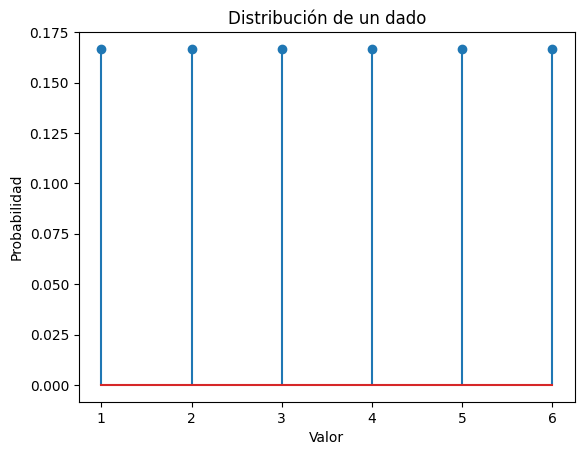

In [2]:
import numpy as np
import matplotlib.pyplot as plt

valores = [1, 2, 3, 4, 5, 6]
probabilidades = [1/6]*6

plt.stem(valores, probabilidades)
plt.title("Distribución de un dado")
plt.xlabel("Valor")
plt.ylabel("Probabilidad")
plt.show()


**Ejemplo:**

Se tienen $2$ urnas, cada una de las cuales contiene $10$ bolas numeradas del $1$ al $10$.

Un experimento aleatorio consiste en seleccionar al azar una bola de cada urna.

Sea $X$ la variable aleatoria que representa la diferencia de los números de las dos bolas seleccionadas.

* Define $\Omega$
* Calcula las probabilidades asociadas
* Define la función de densidad
* Verifica que $\sum_{x\in R_X}f_X(x) = 1$
* Gráfica la función de densidad

Además, calcula la probabilidad de que los números de las dos bolas seleccionadas difieran por $2$ o más.

Cardinalidad de Ω: 100
Función de densidad: {5: 0.1, 4: 0.12, 1: 0.18, 0: 0.1, 6: 0.08, 3: 0.14, 2: 0.16, 8: 0.04, 7: 0.06, 9: 0.02}
Suma de las probabilidades: 1.0


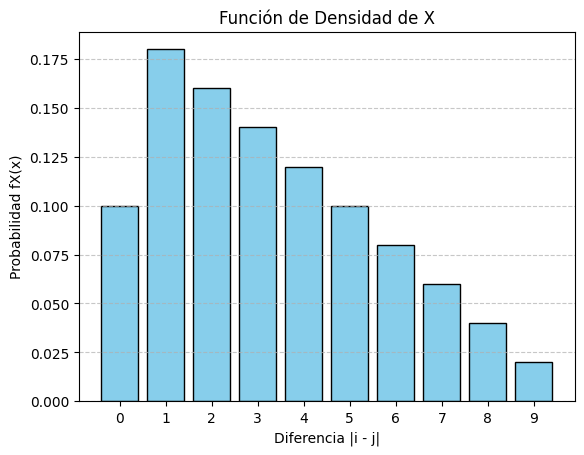

P(X ≥ 2) = 0.72


In [15]:
# Importamos las librerías necesarias
from itertools import product
from collections import defaultdict
from fractions import Fraction
import pandas as pd
import matplotlib.pyplot as plt

# -------------------- 1. Definir el espacio muestral (Ω) --------------------
Omega = set(product(range(1, 11), repeat=2))  # Todas las combinaciones (i, j) con i, j ∈ {1, ..., 10}
card_Omega = len(Omega)  # Tamaño del espacio muestral

print(f"Cardinalidad de Ω: {card_Omega}")

# -------------------- 2. Definir la variable aleatoria X = |i - j| --------------------
X = {(i, j): abs(i - j) for i, j in Omega}  # Diccionario donde cada par (i, j) se asocia con |i - j|

# Agrupamos por valores de X
dX = defaultdict(set)
for (i, j), x in X.items():
    dX[x].add((i, j))

# -------------------- 3. Calcular las probabilidades asociadas --------------------
def P(A):
    return Fraction(len(A), card_Omega)  # Probabilidad como fracción

# Función de densidad fX(x)
fX = {x: P(A) for x, A in dX.items()}
fX_decimal = {x: float(p) for x, p in fX.items()}  # Convertimos a decimal

print(f"Función de densidad: {fX_decimal}")

# -------------------- 4. Verificar que ∑ fX(x) = 1 --------------------
suma_prob = sum(fX_decimal.values())
print(f"Suma de las probabilidades: {suma_prob}")

# -------------------- 5. Graficar la función de densidad --------------------
df_fX = pd.DataFrame(list(fX_decimal.items()), columns=['x', 'fX(x)']).sort_values(by='x')

plt.bar(df_fX['x'], df_fX['fX(x)'], color='skyblue', edgecolor='black')
plt.xlabel("Diferencia |i - j|")
plt.ylabel("Probabilidad fX(x)")
plt.title("Función de Densidad de X")
plt.xticks(range(10))  # Posibles valores de X
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# -------------------- 6. Calcular P(X ≥ 2) --------------------
P_X_mayor_igual_2 = sum(fX_decimal[x] for x in range(2, 10))
print(f"P(X ≥ 2) = {P_X_mayor_igual_2}")

In [3]:
import numpy as np # Importamos Numpy
import numpy.random as npr # para generar numeros aleatorios

import scipy.stats as sps # Importamos el modulo SciPy
from scipy.stats import randint # para trabajar una uniforme discreta en un rango de enteros

import matplotlib.pyplot as plt #Visualizar datos

import random # para generar numeros aleatorios

### 2.1.1 Variable aleatoria uniforme discreta

Una variable aleatoria $X$ tiene distribución uniforme discreta en el conjunto $\{x_1,...,x_n\}$ si su función de densidad está dada por
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} \frac{1}{n}, \quad \text{si } x\in \{x_1,...,x_n\} \\
0, \quad \text{e.o.c} \end{cases}$$

Se llama uniforme porque cada uno de sus posibles resultados de $X$ tienene la misma probabilidad.

**Notación:** $X\sim Unif(x_1,...,x_n)$

La esperanza y varianza de $X$, están dadas por:

$$ \mathbb{E}[X] = \sum_{x} xf_X(x) = \frac{x_n + x_1}{2} $$
y
$$ \text{Var}(X) = \mathbb{E}\left[ (X-\mathbb{E}[X])^2\right] = \frac{(x_n - x_1 + 1)^2 -1}{12}$$

$\color{red}{\text{Ejercicio 1.}}$ Verifica que, en efecto, la esperanza y varianza de una variable aleatoria uniforme.

La función de distribución de una v.a. uniforme es:
$$ F_X(x) = \mathbb{P}(X\le x) = \begin{cases} 0, \quad \text{si } x < x_1 \\ \frac{x}{n}, \quad \text{si } x\in \{x_1,...,x_n\} \\
1, \quad \text{si } x > x_n \end{cases}$$

**Solución:**

***1. Verificar la Esperanza***

La esperanza se define como sigue:
$$\mathbb{E}[X] = \sum_{k}kf_{X}(k)$$

Dado que $X$ es una v.a. con distribución Uniforme discreta, cada valor tiene la misma probabilidad:
$$f_X(k) = \frac{1}{n}, \quad \text{para } k \in \{x_1, x_2, \dots, x_n\}.$$

Entonces,
$$\mathbb{E}[X] = \sum_{k=x_1}^{x_n}k̇ \cdot \frac{1}{n}$$ \

Factorizando $\frac{1}{n}$:
$$\mathbb{E}[X] = \frac{1}{n} \sum_{k=x_1}^{x_n}k̇ $$ \

La suma de los primeros $m$ enteros es:
$$\sum_{k=1}^{m}k̇ = \frac{m(m+1)}{2}  $$ \

Aplicamos la fórmula para la suma desde $x_1$ hasta $x_n$:
$$\sum_{k=x_1}^{x_n}k̇ = \frac{x_n(x_n+1)}{2} - \frac{(x_1-1)x_1}{2} $$ \
$$ = \frac{x_n^2 + x_n - x_1^2 +x_1}{2} $$ \

Dividimos entre $n$:
$$\mathbb{E}[X] = \frac{(x_n - x_1 +1) (x_n +x_1)}{2 (x_n - x_1 +1)}$$ \
$$\mathbb{E}[X] = \frac{x_n+x_1}{2}$$ \

$$\therefore \text{Se verifica el cálculo de la esperanza.} $$


***2. Verificar la Varianza***

La esperanza se define como sigue:
$$\mathbb{Var}[X] = \mathbb{E}[X^2] - (\mathbb{E}[X])^2 $$ \


Para calcular $\mathbb{E}[X^2]$:
$$\mathbb{E}[X^2] = \sum_{k=x_1}^{x_n}k̇^2 f_X(k) $$ \

Sustituyendo $f_X(k) = \frac{1}{n}$:
$$\mathbb{E}[X^2] = \frac{1}{n} \sum_{k=x_1}^{x_n}k̇^2 $$ \

La suma de los cuadrados de los primeros $m$ enteros es:
$$\sum_{k=1}^{m}k̇^2 = \frac{m(m+1)(2m+1)}{6}$$ \

Aplicamos la fórmula desde $x_1$ hasta $x_n$:
$$\sum_{k=x_1}^{x_n}k̇^2 = \frac{x_n(x_n+1)(2x_n+1)}{6}-\frac{(x_1-1)x_1(2x_1-1)}{6}$$ \

Dividiendo por $n$:
$$\mathbb{E}[X^2] = \frac{1}{n} \times \frac{x_n(x_n+1)(2x_n+1)-(x_1-1)x_1(2x_1-1)}{6} $$ \

Calculamos $\mathbb{Var}(X)$:
$$\mathbb{Var}(X) = \mathbb{E}[X^2] - (\frac{x_n+x_1}{2})^2$$ \

Se puede demostrar que:
$$\mathbb{Var}(X) = \frac{(x_n-x_1+1)^2-1}{12}$$ \

$$\therefore \text{Se verifica el cálculo de la varianza.} $$

In [4]:
import numpy as np # Importamos Numpy
import numpy.random as npr # para generar numeros aleatorios

import scipy.stats as sps # Importamos el modulo SciPy
from scipy.stats import randint # para trabajar una uniforme discreta en un rango de enteros

import matplotlib.pyplot as plt #Visualizar datos

import random # para generar numeros aleatorios

$\color{red}{\text{Ejercicio 2.}}$ Calcular la esperanza y varianza.    
Supongamos que nos interesa calcular la probabilidad de que el premio sea mayor a $\$80$, entonces
$$ \mathbb{P}(X>80) = \sum_{k=81}^{100} \frac{1}{100} = \frac{20}{100} = 0.2 $$

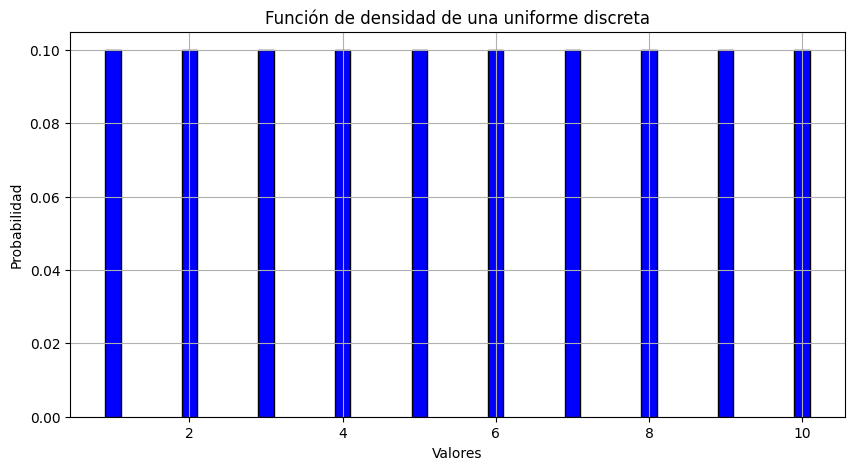

Esperanza: 5.5
Varianza: 8.25
P(X > 80): 0.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de la distribución uniforme discreta [low, high)
low = 1  # Límite inferior
high = 11  # Límite superior (se usa 11 para incluir 10)

# Crear los valores posibles dentro del rango
x = np.arange(low, high)

# Calcular la función de masa de probabilidad
pmf = np.full_like(x, 1 / (high - low), dtype=float)

# Para crear una figura más grande
plt.figure(figsize=(10, 5))

# Graficar pmf
plt.bar(x, pmf, width=0.2, color='b', edgecolor='black')

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una uniforme discreta')
plt.grid(True)

plt.show()  # Mostrar la gráfica

# Calcular y mostrar la esperanza y la varianza
esperanza = np.mean(x)
varianza = np.var(x)

print(f"Esperanza: {esperanza}")
print(f"Varianza: {varianza}")

# Calcular y mostrar P(X > 80)
probabilidad_mayor_80 = np.mean(x > 80)
print(f"P(X > 80): {probabilidad_mayor_80}")

### 2.1.2 Variable aleatoria Bernoulli con parámetro $p \in (0,1)$

Este modelo se aplica a un experiemento cuyo espacio muestral tiene dos resultados
$$ \Omega = \{\text{éxito} , \text{fracaso}\}$$
y definimos
- $X(\{\text{éxito}\}) =1$
- $X(\{\text{fracaso}\}) =0$

Las probabilidades asociadas a este modelo son
- $\mathbb{P}(\{\text{éxito}\}) = p$
- $\mathbb{P}(\{\text{fracaso}\}) = 1-p$
donde $0<p<1$.

La función de densidad, está definida de la siguiente manera
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} p^x(1-p)^{1-x}, \quad \text{si } x\in \{0,1\} \\
0, \quad \text{e.o.c} \end{cases}$$

**Notación:** $X\sim Ber(p)$

Mediante la combinación de v.a. Bernoulli es posible construir otras v.a.

La esperanza y varianza de $X\sim Ber(p)$, esá dada por:

$$ \mathbb{E}[X] =\sum_{x=0}^{1} x f_{X}(x) = 0\cdot (1-p) + 1 \cdot p = p $$
y
$$ \mathbb{E}[X^2] =\sum_{x=0}^{1} x^2 f_{X}(x) = 0^2 \cdot (1-p) + 1^2 \cdot p = p $$
entonces
$$ \text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2  = p - p^2 = p(1-p)$$

La función de densidad =  [0.7 0.3]


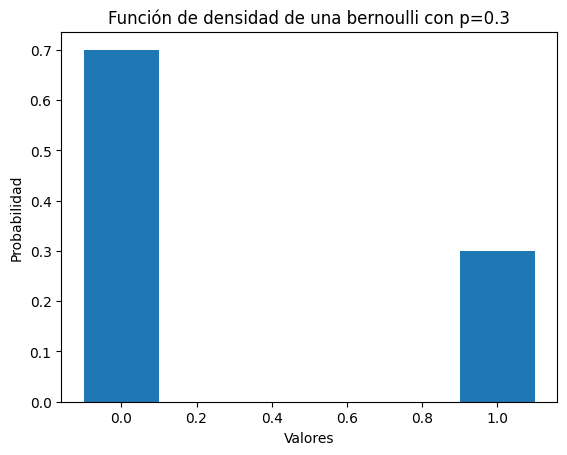

La esperanza es =  0.3
La varianza es =  0.21


In [6]:
from scipy.stats import bernoulli

#Definimos nuestra probabilidad de éxito
p=0.3

#Defino los posibles valores
x=[0,1]

#Calculamos la función de densidad
pmf = bernoulli.pmf(x, p)

print("La función de densidad = ", pmf)

#Graficamos la función de densidad
plt.bar(x,pmf,width=0.2)
plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una bernoulli con p=0.3')
#plt.grid(True)
plt.show() #mostrar el gráfica

#Calculo de la esperanza
print("La esperanza es = ", bernoulli.mean(p))

#Calculo de la varianza
print("La varianza es = ", bernoulli.var(p))

### 2.1.3 Variable aleatoria Binomial con parámetros  $n$ y $p \in (0,1)$

Decimos que una v.a. $X$ tiene distribución binomial con parámetros $n$ y $p$, si su función de densidad está dada por
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} \binom{n}{x}p^x (1-p)^{n-x}, \quad \text{si } x\in \{0,1,...,n\} \\
0, \quad \text{e.o.c} \end{cases}$$
donde $n\in\mathbb{Z}_{+}$ y $0<p<1$.

**Obs:** Los ensayos deben ser independientes.

La esperanza de $X$ es
$$\begin{align*}
\mathbb{E}[X]&= \sum_{x \mathop = 0}^n x \binom n x p^x (1-p)^{n - x}\\
&=\sum_{x \mathop = 1}^n x \binom n x p^x (1-p)^{n - x}\\
&= \sum_{x \mathop = 1}^n n \binom {n - 1} {x - 1} p^x (1-p)^{n - x}\\
&= n p \sum_{x \mathop = 1}^n \binom {n - 1} {x - 1} p^{x - 1} (1-p)^{( {n - 1}) - ( {x - 1}) }\\
&=n p \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j}\\
&=np.
\end{align*}$$
y
$$ \begin{align*}
\mathbb{E}[X^2]&= \sum_{x \mathop = 0}^n x^2 \binom n x p^x (1-p)^{n - x}\\
&=\sum_{x \mathop = 0}^n x n \binom {n - 1} {x - 1} p^x (1-p)^{n - x}\\
&= n p \sum_{x \mathop = 1}^n x \binom {n - 1} {x - 1} p^{x - 1} (1-p)^{({n - 1}) - ({x - 1}) }\\
&= n p \sum_{j \mathop = 0}^m ({j + 1}) \binom m j p^j (1-p)^{m - j}\\
&=n p \left( {\sum_{j \mathop = 0}^m j \binom m j p^j (1-p)^{m - j} + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j} }\right)\\
&=n p \left( {\sum_{j \mathop = 0}^m m \binom {m - 1} {j - 1} p^j (1-p)^{m - j} + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j} }\right)\\
&= n p \left( (n - 1) p \sum_{j \mathop = 1}^m \binom {m - 1}{j - 1} p^{j - 1} (1-p)^{( {m - 1}) - ({j - 1}) } + \sum_{j \mathop = 0}^m \binom m j p^j (1-p)^{m - j}\right) \\
&= n p \left( (n - 1) p (p + (1-p))^{m - 1} + (p + (1-p))^m\right)\\
&= n p ((n - 1) p + 1)\\
&= (np)^2 +np(1-p),
\end{align*} $$

Por lo que la varianza de $X$ es
$$\text{Var}(X) = np(1-p) $$

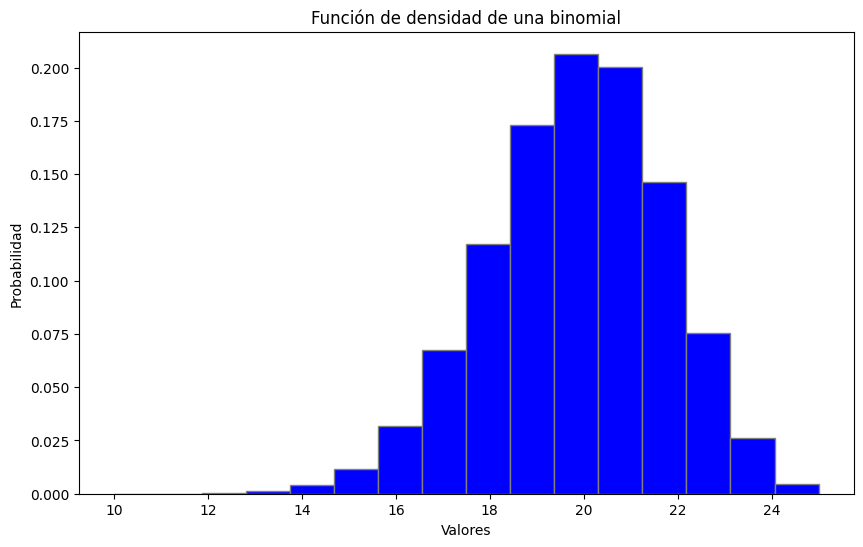

In [7]:
n = 25 # número de ensayos bernoulli
p = 0.8 # probabilidad de éxito
s= 100000 # número de muestras

#Vamos a generar numeros aleatorios que siguen una distribución binomial
binom_numeros = sps.binom.rvs(n,p,size=s)

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    binom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(binom_numeros)), # número de barras del histograma
    color = "blue",
    edgecolor="grey"
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una binomial')
#plt.grid(True)
plt.show() #mostrar el gráfica

### 2.1.4 Variable aleatoria Poisson

Es una distribución de probabilidad discreta que sirve para calcular la probabilidad de que ocurra un determinado número de eventos raros durante un intervalo dado (puede ser tiempo, lingitud, área, etc).

Esta v.a. tomavalores sobre el conjunto $\{0,1,2,...\}$ y tiene un parámetro $\lambda>0$, el cual representa el número de veces que se **espera** que ocurra un evento durante un intervalo dado.

Su función de densidad, está dado como sigue:
$$ f_X(x) = \mathbb{P}(X=x) = \begin{cases} e^{-\lambda}\frac{\lambda^x}{x!}, \quad \text{si } x\in \{0,1,...\} \\
0, \quad \text{e.o.c} \end{cases}$$

Notemos que $\mathbb{E}[X]=\lambda$ y que $\text{Var}(X)=\lambda$.



**Ejemplo:**

Supongamos que el número de accidentes que ocurre en un punto en un día tiene distribución Poisson con parámetro $\lambda=2$,

- ¿cuál es la probabilidad de que en un día ocurran más de dos accidentes?
  $$ \begin{align*} \mathbb{P}(X>2) &= 1- \mathbb{P}(X\le 2) \\
    &= 1- [\mathbb{P}(X=0) + \mathbb{P}(X=1) + \mathbb{P}(X=2)] \\
    &= 1- \left[ e^{-2}\frac{2^0}{0!} + e^{-2}\frac{2^1}{1!} + e^{-2}\frac{2^2}{2!} \right] \\
    &= 1 - e^{-2}[1+2+2] = 1-5e^{-2} = 0.3233
    \end{align*} $$
- ¿cuál es la probabilidad de que ocurran más de dos accidentes sabiendo que por lo menos ocurre uno?
  $$ \begin{align*} \mathbb{P}(X>2 \mid X \ge 1) &= \frac{\mathbb{P}(\{X>2\} \cap \{X \ge 1\} )}{\mathbb{P}\{X \ge 1)\}} \\
       &= \frac{\mathbb{P}(\{X>2\})}{\mathbb{P}\{X \ge 1)\}} \\
       & = \frac{.3233}{1-\mathbb{P}(X<1)} = \frac{0.3233}{1-e^{-2}} \frac{0.3233}{.8646} = 0.3739
       \end{align*}

$\color{red}{\text{Ejercicio 3.}}$ Usando el atributo anterior, calcula las siguientes probabilidades:

In [8]:
from scipy.stats import poisson

lambda_poisson = 2
distribucion_poisson = poisson(lambda_poisson)

# Cálculo de P(X > 2)
probabilidad_mayor_2 = 1 - distribucion_poisson.cdf(2)
print(f"P(X > 2): {probabilidad_mayor_2}")

# Cálculo de P(X > 2 | X >= 1)
probabilidad_mayor_igual_1 = 1 - distribucion_poisson.cdf(0)
probabilidad_condicional = probabilidad_mayor_2 / probabilidad_mayor_igual_1
print(f"P(X > 2 | X >= 1): {probabilidad_condicional}")

P(X > 2): 0.3233235838169366
P(X > 2 | X >= 1): 0.37392942900133747


### 2.1.5 Aproximación de la variable aleatoria Poisson a la variable aleatoria Binomial

La distribución de Poisson es una forma límite de la distribución binomial, es decir, es una buena aproximación cuando $n$ es suficientemente grande y $p$ suficientemente pequeña.

$\textbf{Teorema (Poisson).-}$ Sean $S_{n}\sim Bin(n,p_{n})$ bajo el regimen $$\lim_{n\to \infty}np_{n}=\lambda>0.$$
Consideremos la siguiente sucesión de números reales:
$$a_{j}(n,p_n)=\begin{cases}\binom{n}{j}(p_n)^{j}(1-p_{n})^{n-j} & j\leq n\\
0 & j\geq n+1\end{cases}$$

 Entonces,
 $$\lim_{n\to \infty}a_{j}(n,p_n)=a_{j}=e^{-\lambda}\frac{\lambda^{j}}{j!} \ \ \forall j\in \mathbb{N}.$$

 El teorema anterior implica que la distribución de Poisson ofrece un modelo probabilístico adecuado para todos aquellos experimentos aleatorios 	en los que las repeticiones son independientes unas de otras y en los 	que sólo hay dos posibles resultados: éxito o fracaso, con probabilidad de 	éxito pequeña, y en los que el interés se centra en conocer el número de éxitos obtenidos al realizar el experimento un número suficientemente grande de veces.

Empíricamente se ha establecido, que la aproximación se puede aplicar con seguridad si $n\ge100$, $p\le 0.01$ y $np \le20$.

**Ejemplo:**

Supongamos que la probabilidad de que un producto producido por cierta máquina es defectuoso es de $0.1$. ¿Cuál es la probabilidad de que un lote de 10 productos contenga a lo más un producto defectuoso?

Sea $X$ el número de productos defectuosos, y sabemos que $X$ tiene una distribución binomial con parámetros $n=10$ y $p=0.1$, entonces
\begin{align*}
\mathbb{P}(X\le 1) &= \mathbb{P}(X=0)+\mathbb{P}(X=1) \\ &= \binom{10}{0}(0.1)^{0}(0.9)^{10-0}+\binom{10}{1}(0.1)^{1}(0.9)^{10-1} \\ &= 0.7361
	\end{align*}

Ahora, con la distribución Poisson, tenemos que $\lambda=10(0.1)=1$, por lo que
$$\mathbb{P}(X\le 1) = \mathbb{P}(X=0)+\mathbb{P}(X=1) = \frac{e^{-1}1^{0}}{0!}+\frac{e^{-1}1^{1}}{1!} = e^{-1}+e^{-1} =0.7358$$

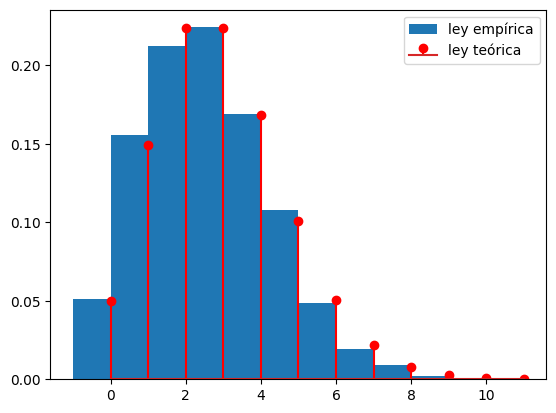

In [9]:
# Simulación de la aproximación de la Bonomial a la Poisson
param=3 # Parametro de la Poisson que queremos aproximar
n=1000 # Este es el número de ensayos en la distribución binomial
N=5000 # Este es el número de simulaciones que realizaremos.

# Genera una muestra de N valores aleatorios de una distribución binomial con parámetros:
# n = 1000 (número de ensayos), p = param/n = 3/1000
X=npr.binomial(n,param/n,N)

# Calcular la frecuencia relativa de los valores simulados
counts = np.bincount(X) / float(N)

# Crear un array de valores posibles
x = np.arange(len(counts))

# Calcular la función de masa de probabilidad (FMP) de la distribución Poisson teórica
f_x = sps.poisson.pmf(x, param)

plt.close()
plt.bar(x - 0.5, counts, width=1., label="ley empírica")
p2 = plt.stem(x, f_x, "r", label="ley teórica")
plt.legend()
plt.show()

### 2.1.6 Variable aleatoria Geométrica con parámetro $p\in (0,1)$.

Esta variable aleatoria cuenta el número de fracasos antes del primer éxito en ensayos bernoulli independientes con parámetro $0<p<1$, y su función de masa de probabilidades está dada por:
$$f_{X}(x)=\begin{cases}
	p(1-p)^{x-1} &\quad \text{si } x=1,2,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$


**Notación:** $X\sim Geo(p)$

La cual es una función de densidad ya que:
* $0\le f_{X}(x)\le 1$ para toda $x$.
* $$\begin{align*}
	\sum_{x\in R_{X}}f_{X}(x) &= \sum_{x=1}^{\infty}(1-p)^{x-1}p \\
	&= p\sum_{y=0}^{\infty}(1-p)^{y} \\
	&= p\left(\frac{1}{1-(1-p)}\right) = 1
    \end{align*}$$

Si por el contrario queremos contar el número de éxitos antes del primer fracaso, tenemos que la función de está dada por:
$$f_{X}(x)=\begin{cases}
	p^{x}(1-p) &\quad \text{si } x=0,1,2,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

Para calcular la esperanza y varianza de $X$, necesitamos del siguiente lema:

**Lema 1.** Sea $x$ un número real tal que $│x│<1$. Entonces,
$$\sum_{k=1}^{\infty}kx^{k-1}=\frac{1}{(1-x)^2}.$$
**Demostración.** Se tiene que
$$\frac{d}{dx}\sum_{k=1}^{\infty}x^{k}=\sum_{k=1}^{\infty}kx^{k-1}.$$
Además,
$$\sum_{k=1}^{\infty}x^{k}=\frac{x}{1-x}.$$
Por lo tanto,
$$\frac{d}{dx}\frac{x}{1-x}=\frac{1}{(1-x)^2}.$$

Como corolario,
$$\sum_{k=1}^{\infty}k(k+1)x^{k-1}=\frac{2}{(1-x)^2}.$$
En efecto,
$$\frac{d}{dx}\sum_{k=1}^{\infty}(k+1)x^{k}=\sum_{k=1}^{\infty}k(k+1)x^{k-1}.$$
Ahora,
$$\sum_{k=1}^{\infty}(k+1)x^{k}=\sum_{m=2}^{\infty}mx^{m-1}=\frac{1}{(1-x)^2}-1.$$

Usando estos resultados, se tiene que la esperanza de $X$ es:
$$\begin{align*}
\mathbb{E}[X]&= \sum_{x=1}^{\infty} x p(1-p)^{x - 1}\\
&= p \frac 1 {(1 - (1-p))^2}\\
&=  \frac p {p^2}\\
&=\frac{1}{p}
\end{align*}$$
y calculamos,
$$ \begin{align*}
\mathbb{E}[X^2]&= \sum_{x=1}^{\infty} x^{2}p(1-p)^{x-1}\\
&=\sum_{x=1}^{\infty}x(x+1)(1-p)^{x-1}p-\sum_{x=1}^{\infty}p(1-p)^{x-1}
\end{align*}$$

Por el Lema 1, se tiene
$$\mathbb{E}[X^2]=p\frac{2}{p^3}-\frac{1}{p}=\frac{2}{p^2}-\frac{1}{p}.$$

Por lo tanto,
$$\text{Var}(X)=\frac{2}{p^2}-\frac{1}{p}-\frac{1}{p^2}=\frac{1-p}{p^2}.$$

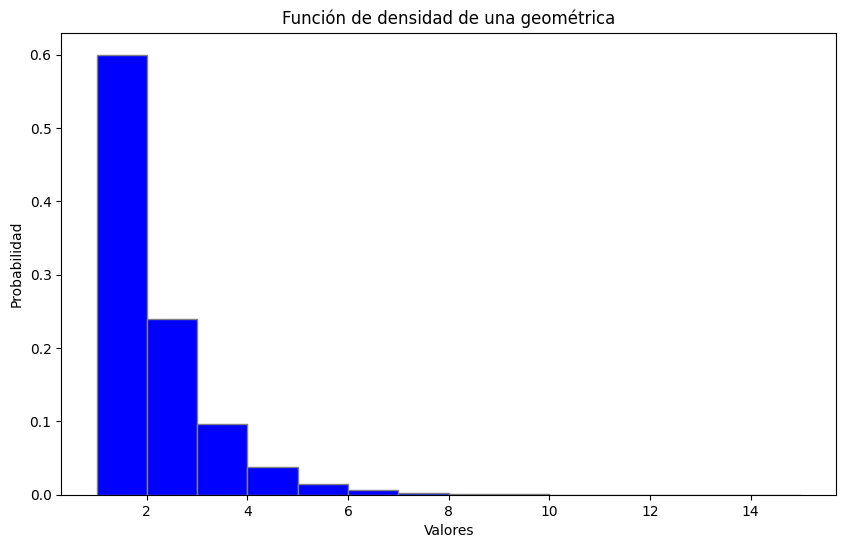

In [10]:
p = 0.6 # probabilidad de éxito
s= 100000 # número de muestras

random.seed(3) #fijar una semilla
#Vamos a generar numeros aleatorios que siguen una distribución geométrica
geom_numeros = sps.geom.rvs(p,size=s)

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    geom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(geom_numeros)), # número de barras del histograma
    color = "blue",
    edgecolor="grey"
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una geométrica')
plt.show() #mostrar el gráfica

### 2.1.7 Variable aleatoria Binomial Negativa con parámetros $r\geq 1$ y $p\in (0,1)$.

Supongamos que se realizan ensayos independientes, cada uno con probabilidad $0<p<1$ de ser un éxito, hasta obtener un total de $r$ éxitos acumulados. Sea $X$ el número de ensayos que se requieren, entonces su función de masa de probabilidades está dada por:
$$ f_{X}(x)=\begin{cases}
	\binom{x-1}{r-1}p^{r}(1-p)^{x-r} &\quad \text{si } x=r,r+1,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

**Notación.** $X\sim \text{BN}(r,p)$.

Se tiene que
$$ \mathbb{E}[X]=\frac{r}{p}$$
y
$$ \text{Var}[X]=\frac{r(1-p)}{p^2}.$$

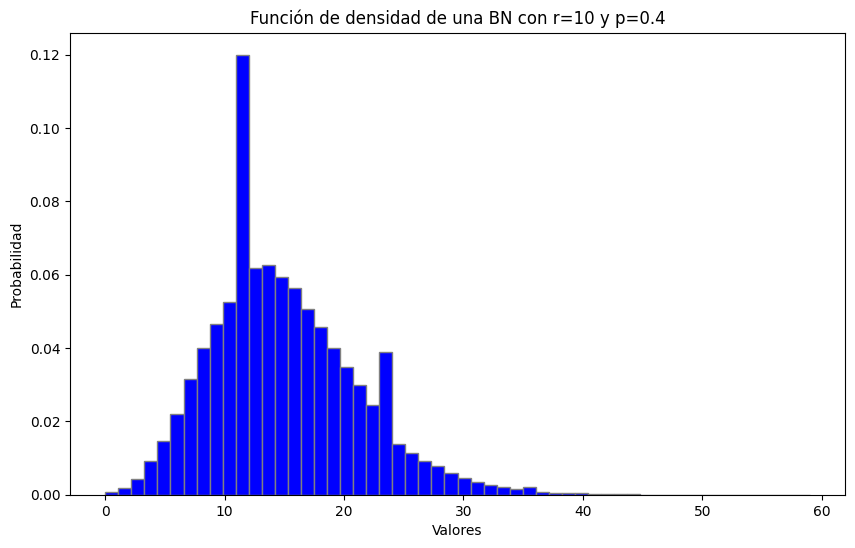

In [11]:
r = 10
p = 0.4 # probabilidad de éxito
s= 100000 # número de muestras

random.seed(3) #fijar una semilla
#Vamos a generar numeros aleatorios que siguen una distribución geométrica
nbinom_numeros = sps.nbinom.rvs(r,p,size=s)

#Creamos un histograma
plt.figure(figsize=(10,6))
plt.hist(
    nbinom_numeros,
    density=True, # Normaliza el area para que sea 1
    bins=len(np.unique(nbinom_numeros)), # número de barras del histograma
    color = "blue",
    edgecolor="grey"
)

plt.xlabel('Valores')
plt.ylabel('Probabilidad')
plt.title('Función de densidad de una BN con r=10 y p=0.4')
plt.show() #mostrar el gráfica

$\color{red}{\text{Ejercicio 4.}}$ Un examen de Estadística consta de 20 preguntas tipo test y se conoce de experiencias
anteriores que un alumno tiene probabilidad 0.7 de contestar bien cada pregunta. Obtener:

a) La probabilidad de que la primera pregunta que contesta bien sea la cuarta.

b) Sabiendo que para aprobar el examen es necesario contestar bien a 10 preguntas, ¿cuál es la probabilidad de que apruebe al contestar la pregunta duodécima?

In [12]:
from scipy.stats import geom, binom

# Datos del problema
prob_correcta = 0.7  # Probabilidad de contestar bien cada pregunta
preguntas_totales = 20  # Número total de preguntas

# a) Probabilidad de que la primera pregunta correcta sea la cuarta
pregunta_objetivo_a = 4  # La cuarta pregunta
prob_a = geom.pmf(pregunta_objetivo_a, prob_correcta)
print(f"a) Probabilidad de que la primera pregunta correcta sea la cuarta: {prob_a}")

# b) Probabilidad de aprobar en la pregunta duodécima
preguntas_necesarias_aprobar = 10  # Necesita 10 correctas para aprobar
preguntas_b = 12  # Pregunta duodécima

# Calcular la probabilidad de 9 correctas en las primeras 11 preguntas
prob_b = binom.pmf(preguntas_necesarias_aprobar - 1, preguntas_b - 1, prob_correcta)

# Multiplicar por la probabilidad de que la pregunta 12 sea correcta
prob_c = prob_b * prob_correcta
print(f"b) Probabilidad de aprobar en la pregunta duodécima: {prob_c}")

a) Probabilidad de que la primera pregunta correcta sea la cuarta: 0.018900000000000007
b) Probabilidad de aprobar en la pregunta duodécima: 0.13982524825499987


$\color{red}{\text{Ejercicio 5.}}$ Investigue sobre el problema de la caja de cerillos de Banach y explique su solución.

 **Problema de la caja de cerillos de Banach**

Un matemático lleva siempre consigo dos cajas de cerillos, una en el bolsillo derecho y otra en el izquierdo. Cada vez que necesita un cerillo, elige al azar uno de los dos bolsillos. Supongamos que inicialmente cada caja contiene N cerillos. ¿Cuál es la probabilidad de que, cuando el matemático descubre que una de las cajas está vacía, la otra caja contenga exactamente k cerillos?

Este problema se resuelve con la distribución binomial negativa porque esta distribución nos dice el número de intentos antes de obtener exito lo que aqui podríamos traducir como exito es que una de las cajas de cerillos quede vacía , y el número de intentos podríamos traducirla como el numero de cerillos que sacó

**Análisis del problema**

La clave del problema está en modelar el proceso como una caminata aleatoria simétrica, donde cada paso corresponde a extraer un cerillo de alguno de los bolsillos con probabilidad \( p = 0.5 \). Cuando uno de los bolsillos se vacía, el proceso termina.

Para simplificar el análisis, consideramos uno de los bolsillos con una cantidad ilimitada de cerillos. Sea \( M \) el número de cerillos extraídos de este bolsillo antes de vaciar el otro. Este número sigue una **distribución binomial negativa**, donde:

- \( p = 0.5 \) es la probabilidad de elegir cada bolsillo.
- Se requieren \( N + 1 \) fallos (vaciar un bolsillo) para terminar.

La probabilidad de que queden exactamente \( k \) cerillos en el bolsillo ilimitado cuando el otro se vacía es:

$$ P[K = k] = {\binom{2N - k}{N - k}} \left(\frac{1}{2}\right)^{2N - k} $$

Este resultado se interpreta como la probabilidad de alcanzar un estado límite donde uno de los bolsillos queda vacío y el otro tiene \( k \) cerillos restantes.

**Esperanza matemática**

Usando aproximaciones avanzadas, como la **aproximación de Stirling**, se demuestra que el valor esperado del número de cerillos restantes es:

$$ E(K) \approx 2\sqrt{\frac{N}{\pi}} - 1 $$

Este resultado refleja la relación entre la magnitud inicial \( N \) y la variabilidad inherente del proceso estocástico.

El problema de la caja de cerillos de Banach es relevante en teoría de colas, procesos de Poisson y análisis de cadenas de Markov, mostrando cómo se distribuyen los recursos finitos bajo selección aleatoria.

### 2.1.8 Variable aleatoria Hipergeométrica con parámetros $n,N,m$.

Supongamos que se elige, sin reemplazo, una muestra de tamaño $n$ de una urna que contiene $N$ bolas, de las cuales $m$ son rojas y $N-m$ son verdes. Sea $X$ el número de bolas rojas seleccionadas, entonces su función de masa de probabilidades está dada por:
$$ f_{X}(x)=
	\frac{\binom{m}{x}\binom{N-m}{n-x}}{\binom{N}{n}} \quad \text{si } x=0,1,\dots, n $$

**Notación.** $X\sim \text{Hiper}(n,N,m)$.

Se tiene que
$$ \mathbb{E}[X]=\frac{nm}{N}$$
y
$$ \text{Var}[X]=\frac{nm}{N}\left[\frac{(n-1)(m-1)}{N-1}+1-\frac{nm}{N} \right].$$

**Nota.** Si $x\leq n$ y $X\sim \text{Hiper}(n,N,m)$, cuando $p=\frac{m}{N}$ y $m,N$ son muy grandes con respecto a $n$ y $x$:
$$\mathbb{P}(X=x)\approx \binom{n}{x}p^{x}(1-p)^{n-x}.$$

$\color{red}{\text{Ejercicio 6.}}$ Replicar la grafica de la función de densidad

Supongamos que se elige, sin reemplazo, una muestra de tamaño $n$ de una urna que contiene $N$ bolas, de las cuales $m$ son rojas y $N-m$ son verdes. Sea $X$ el número de bolas rojas seleccionadas, entonces su función de masa de probabilidades está dada por:
$$ f_{X}(x)=
	\frac{\binom{m}{x}\binom{N-m}{n-x}}{\binom{N}{n}} \quad \text{si } x=0,1,\dots, n $$

**Notación.** $X\sim \text{Hiper}(n,N,m)$.

Se tiene que
$$ \mathbb{E}[X]=\frac{nm}{N}$$
y
$$ \text{Var}[X]=\frac{nm}{N}\left[\frac{(n-1)(m-1)}{N-1}+1-\frac{nm}{N} \right].$$

**Nota.** Si $x\leq n$ y $X\sim \text{Hiper}(n,N,m)$, cuando $p=\frac{m}{N}$ y $m,N$ son muy grandes con respecto a $n$ y $x$:
$$\mathbb{P}(X=x)\approx \binom{n}{x}p^{x}(1-p)^{n-x}.$$

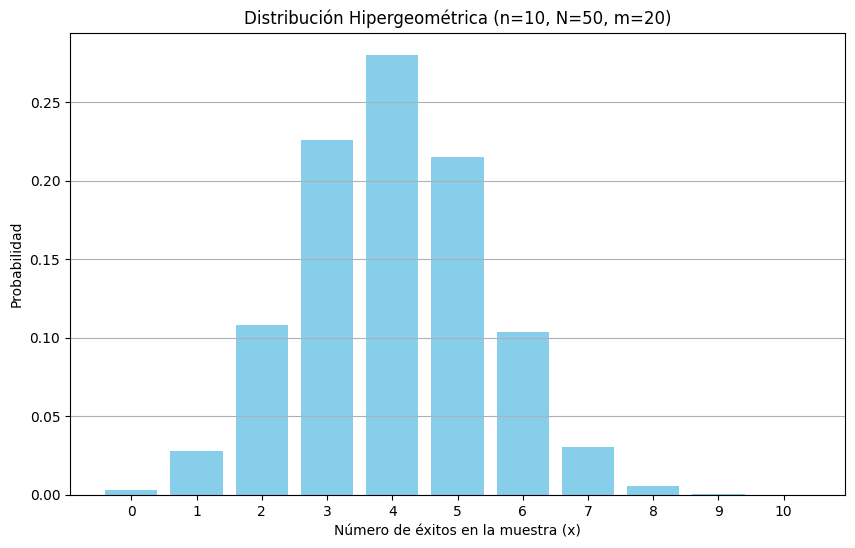

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def hipergeometrica_pmf(x, n, N, m):
    """Calcula la PMF de la distribución hipergeométrica."""
    numerador = comb(m, x, exact=True) * comb(N - m, n - x, exact=True)
    denominador = comb(N, n, exact=True)
    return numerador / denominador

def graficar_hipergeometrica(n, N, m):
    """Grafica la PMF de la distribución hipergeométrica."""
    x_values = np.arange(0, min(n, m) + 1)
    pmf_values = [hipergeometrica_pmf(x, n, N, m) for x in x_values]

    plt.figure(figsize=(10, 6))
    plt.bar(x_values, pmf_values, color='skyblue')
    plt.xlabel('Número de éxitos en la muestra (x)')
    plt.ylabel('Probabilidad')
    plt.title(f'Distribución Hipergeométrica (n={n}, N={N}, m={m})')
    plt.xticks(x_values)
    plt.grid(axis='y')
    plt.show()

# Ejemplo de uso
n = 10  # Tamaño de la muestra
N = 50  # Tamaño de la población
m = 20  # Número de éxitos en la población

graficar_hipergeometrica(n, N, m)

$\color{red}{\text{Ejercicio 7.}}$ Una compañía petrolera realiza un estudio geológico que indica que un pozo petrolero exploratorio debería tener un 20% de posibilidades de encontrar petróleo.

- ¿Cuál es la probabilidad de que el primer pozo se produzca en el tercer pozo perforado?

- ¿Cuál es la probabilidad de que el tercer pozo se produzca en el séptimo pozo perforado?

- ¿Cuál es la media y la varianza del número de pozos que se deben perforar si la compañía petrolera quiere establecer tres pozos productores?

In [14]:
from scipy.stats import geom, nbinom

# Datos del problema
prob_exito = 0.2  # Probabilidad de encontrar petróleo

# a) Probabilidad de que el primer pozo se produzca en el tercer pozo
prob_a = geom.pmf(3, prob_exito)
print(f"a) Probabilidad: {prob_a}")

# b) Probabilidad de que el tercer pozo se produzca en el séptimo pozo
prob_b = nbinom.pmf(4, 3, prob_exito)  # nbinom.pmf(k-r, r, p)
print(f"b) Probabilidad: {prob_b}")

# c) Media y varianza del número de pozos para 3 éxitos
media = 3 / prob_exito
varianza = (3 * (1 - prob_exito)) / (prob_exito ** 2)
print(f"c) Media: {media}, Varianza: {varianza}")

a) Probabilidad: 0.12800000000000003
b) Probabilidad: 0.04915200000000004
c) Media: 15.0, Varianza: 60.0


## 2.2 Variables Aleatorias Continuas

Una variable aleatoria continua es aquella que puede tomar cualquier valor dentro de un intervalo de números reales.

Puede asumir infinitos valores posibles dentro de un rango determinado o incluso en todo R.

**Definición.**

Una variable aleatoria absolutamente continua es aquella para la cual existe una función $f_X$ no negativa, llamada función de densidad, tal que:
$$
F_X(x) = \mathbb{P}(X\leq x) = \int_{-\infty}^{x} f_X(y) dy, \quad x\in \mathbb{R}
$$

**Lema.**

Sea $F_X$ una función de distribución. Supongamos que $F_X$ es derivable y que su derivada es continua en $(a, b)$, donde:

$ a = \inf \{ x \in \mathbb{R} \mid F_X(x) > 0 \}, \quad b = \sup \{ x \in \mathbb{R} \mid F_X(x) < 1 \}$

entonces, la función de densidad se puede obtener como:
$$ f_X(x) =
\begin{cases}
F'_X(x), & \text{si } x \in (a, b), \\
0, & \text{e.o.c.}
\end{cases}$$

Es decir,
$$ \frac{dF_X(x)}{dx} = f_X(x)$$

**Propiedades:**


1.   Se describe con una función de densidad de probabilidad (f.d.p.), no con probabilidades directas: Indica qué tan probable es que la variable tome valores alrededor de un punto, pero no una probabilidad exacta (porque la probabilidad puntual en una variable continua siempre es 0).
$$f(x)$$
2.   La probabilidad de un intervalo se obtiene como el área bajo la curva de la función de densidad:
$$\sum_{i}^{}P(X=x_i)=1$$
3. La función de densidad debe cumplir dos condiciones:
- No negatividad:
$$f(x) \geq 0 $$
- Área total bajo la curva a 1:
$$\int_{-∞}^{∞} f(x)dx=1$$
4. La probabilidad de que la variable tome un valor exacto es cero: Porque hay infinitos valores posibles en cualquier intervalor
$$P(X=a)=0$$
5. Esperanza: Para calcular la esperanza, se utiliza
$$E[X]=∫x⋅f(x)dx$$
6. Varianza: Para calcular la varianza de una v.a discreta, se utiliza
  $$ Var(X) = E[X^2] - (E[X])^2 =∫(x-E[X])^2·f(x)dx $$

### 2.2.1 Distribución Uniforme

Es una distribución de probabilidad donde todos los valores dentro de un intervalo tienen la misma probabilidad de ocurrir.

* Uniforme Discreta: Cuando toma un número finito de valores
* Uniforme Continua: Cuando puede tomar cualquier valor real dentro de un intervalo [a,b]

**Función de Densidad:**
$$f(x)=f(x) =
\begin{cases}
\frac{1}{b-a}, & \text{si } a \leq x \leq b \\
0, & \text{en otro caso}
\end{cases}$$

**Ejercicio:**

Un alumno se dirige a la biblioteca para solicitar el préstamo de un libro y decide que no puede esperar más de $10$ minutos en ser atendido. Supongamos que el bibliotecario tarda por lo menos $0.5$ minutos en atender a una persona, entonces es razonable proponer una distribución uniforme en el intervalo $[0.5,10]$ para modelar el comportamiento de la variable $X$ que es el tiempo en ser atendido (en  minutos).

- Da la función de densidad y gráfica.
- ¿Cuál es la probabilidad de que el tiempo en ser atendido sea mayor a $5$ minutos pero menor a $8$ minutos?
- ¿Cuál es la esperanza y varianza?
- Calcula la función de distribución y gráficala, y con ella calcula: $\mathbb{P}(2.51\le X \le 7.99)$.

Probabilidad de que 5 < X < 8: 0.3158
Esperanza (E[X]): 5.25
Varianza (Var[X]): 7.52


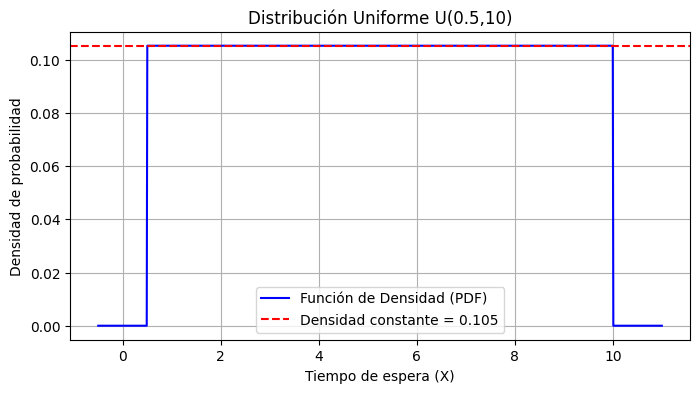

Probabilidad de que 2.51 ≤ X ≤ 7.99: 0.5768


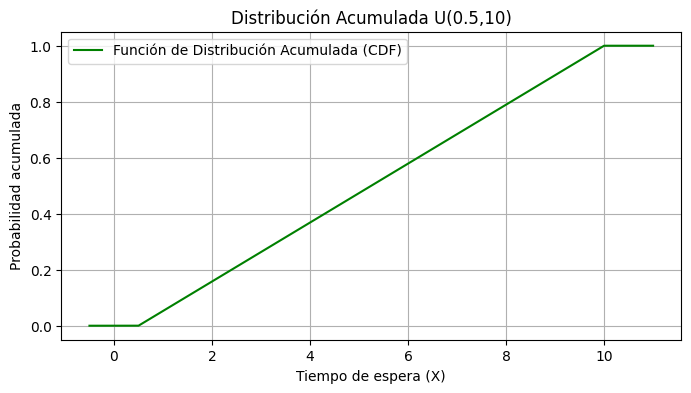

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Definir los parámetros de la distribución uniforme
a, b = 0.5, 10  # Intervalo [0.5, 10]

# Crear la función de densidad (PDF)
x = np.linspace(a - 1, b + 1, 1000)  # Valores en un rango mayor para visualizar mejor
pdf = uniform.pdf(x, loc=a, scale=b-a)

# ---- 2. Calcular P(5 < X < 8) ----
prob_5_8 = uniform.cdf(8, loc=a, scale=b-a) - uniform.cdf(5, loc=a, scale=b-a)
print(f"Probabilidad de que 5 < X < 8: {prob_5_8:.4f}")

# ---- 3. Calcular esperanza y varianza ----
esperanza = (a + b) / 2
varianza = ((b - a) ** 2) / 12
print(f"Esperanza (E[X]): {esperanza:.2f}")
print(f"Varianza (Var[X]): {varianza:.2f}")

# Graficar la función de densidad
plt.figure(figsize=(8, 4))
plt.plot(x, pdf, label='Función de Densidad (PDF)', color='b')
plt.axhline(y=1/(b-a), color='r', linestyle='--', label=f'Densidad constante = {1/(b-a):.3f}')
plt.xlabel("Tiempo de espera (X)")
plt.ylabel("Densidad de probabilidad")
plt.title("Distribución Uniforme U(0.5,10)")
plt.legend()
plt.grid()
plt.show()

# ---- 4. Función de distribución acumulada (CDF) y P(2.51 ≤ X ≤ 7.99) ----
x_cdf = np.linspace(a - 1, b + 1, 1000)
cdf = uniform.cdf(x_cdf, loc=a, scale=b-a)

# Calcular P(2.51 ≤ X ≤ 7.99)
prob_2_51_7_99 = uniform.cdf(7.99, loc=a, scale=b-a) - uniform.cdf(2.51, loc=a, scale=b-a)
print(f"Probabilidad de que 2.51 ≤ X ≤ 7.99: {prob_2_51_7_99:.4f}")

# Graficar la función de distribución acumulada (CDF)
plt.figure(figsize=(8, 4))
plt.plot(x_cdf, cdf, label='Función de Distribución Acumulada (CDF)', color='g')
plt.xlabel("Tiempo de espera (X)")
plt.ylabel("Probabilidad acumulada")
plt.title("Distribución Acumulada U(0.5,10)")
plt.legend()
plt.grid()
plt.show()

### 2.2.2 Variable aleatoria uniforme sobre $(a,b)$

Una variable aleatoria $X$ se dice que tiene distribución uniforme continua  en el intervalo $(a,b)$ con $a,b\in\mathbb{R}$, si su función de densidad esta dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{b-a} &\quad \text{si } a< x < b\\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$

**Notación.** $X\sim \text{Unif}(a,b)$ $\text{Unif}[a,b]$

**Obs:**
* La distribución uniforme continua en $(a,b)$ es simétrica.
* A los intervalos de la misma longitud contenidos en $(a,b)$ se les asigna la misma probabilidad. Esto se representa gráficamente con la probabilidad de que $X$ se encuentre en el intervalo $(s,t)$:


La función de distribución de $X\sim Unif((a,b))$ esta dada por:
$$F_{X}(x)=\begin{cases}
	 0 &\quad \text{si } x\le a \\
	\frac{x-a}{b-a} &\quad \text{si } a<x<b\\
	 1 &\quad \text{si } x\ge b  
\end{cases}$$

La esperanza de una variable aleatoria uniforme es la siguiente,
$$\begin{align*}
\mathbb{E}[X] &= \int_{a}^{b}xf_{X}(x)dx = \int_{a}^{b}x\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}xdx  = \frac{1}{b-a}\left[\frac{x^{2}}{2}\right]_{a}^{b} \\ &= \frac{1}{b-a}\left[\frac{b^{2}}{2}-\frac{a^{2}}{2}\right] =  \frac{b^{2}-a^{2}}{2(b-a)} = \frac{(b-a)(b+a)}{2(b-a)} = \frac{a+b}{2}.
\end{align*}$$

Para calcular la varianza, primero vamos a calcular el segundo momento
$$\begin{align*}
\mathbb{E}[X^{2}] &= \int_{a}^{b}x^{2}f_{X}(x)dx = \int_{a}^{b}x^{2}\frac{1}{b-a}dx = \frac{1}{b-a}\int_{a}^{b}x^{2}dx \\ &= \frac{1}{b-a}\left[\frac{x^{3}}{3}\right]_{a}^{b} = \frac{1}{b-a}\left[\frac{b^{3}}{3}-\frac{a^{3}}{3}\right] =  \frac{b^{3}-a^{3}}{3(b-a)}.
\end{align*}$$

Por lo que se tiene lo siguiente

$$Var(X) = \mathbb{E}[X^{2}]-(\mathbb{E}[X])^{2} =\frac{b^{3}-a^{3}}{3(b-a)}-\left(\frac{a+b}{2}\right)^{2} = \frac{(b-a)^{2}}{12}.$$

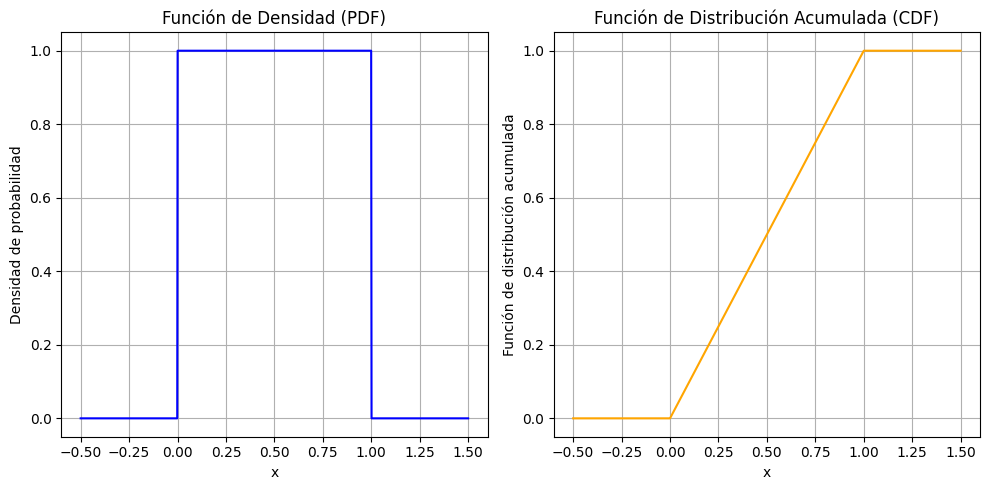

In [17]:
# Parámetros de la distribución uniforme
a = 0  # límite inferior
b = 1  # límite superior

# Definimos las funciones de densidad y distribución
# Función de densidad (pdf) de la distribución uniforme
def uniform_pdf(x, a, b):
    return np.where((x >= a) & (x <= b), 1 / (b - a), 0)

# Función de distribución (cdf) de la distribución uniforme
def uniform_cdf(x, a, b):
    return np.where(x < a, 0, np.where(x > b, 1, (x - a) / (b - a)))

# Generar valores de x
x = np.linspace(-0.5, 1.5, 1000)

# Calcular la función densidad
pdf_values = uniform_pdf(x, a, b)

# Calcular la función de distribución
cdf_values = uniform_cdf(x, a, b)

# Graficar la PDF
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_values, label='PDF', color='blue')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad (PDF)')
plt.grid(True)

# Graficar la CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf_values, label='CDF', color='orange')
plt.xlabel('x')
plt.ylabel('Función de distribución acumulada')
plt.title('Función de Distribución Acumulada (CDF)')
plt.grid(True)

plt.tight_layout()
plt.show()

### 2.2.3 Variable aleatoria exponencial con parámetro $\lambda>0$.

La distribución exponencial es una de las distribuciones continuas más utilizadas. A menudo se utiliza para modelar el tiempo transcurrido entre eventos.  

Se dice que la variable aleatoria $X$ tiene distribución exponecial de parámetro $\lambda>0$, si su función de densidad está dada por:
$$f_{X}(x)=\begin{cases}
\lambda e^{-\lambda x} & x>0\\
0 & \text{en otro caso}
\end{cases}$$


**Notación**. $X\sim \exp(\lambda).$

**Ejemplo:**

Consideremos la variable aleatoria $X$ como el tiempo (en minutos) entre la llegada de dos personas a la fila  de una sucuarsal bancaria.

Adicionalmente, el banco ha determinado que solo el $10\%$ de las veces, el tiempo que transcurre entre la llegada de una persona y otra es mayor a dos minutos.

Esto permite calcular el valor de $\lambda$, ya que
$$\mathbb{P}(X>2)=0.1$$
entonces
$$1-\mathbb{P}(X\le 2) = 1-F_{X}(2) = 0.1$$

NOtemos que si $X\sim Exp\left( \lambda \right)$, entonces $F_{X})(x) = 1-e^{-\frac{x}{\lambda}}$

Por lo que $F_{X}(2)= 1-e^{\frac{-2}{\lambda}} =0.9$, entonces
$e^{\frac{-2}{\lambda}}=0.1$. Por lo que
$$\frac{-2}{\lambda}=\ln(0.1) \Rightarrow \lambda=0.87$$
Por lo tanto $X\sim\exp(0.87)$.

**Teorema:**

Sea $\varepsilon>0$ y $Y_{\epsilon}\sim Geo(p_{\varepsilon})$. Supongamos que nos encontramos en el regimen:
$$\lim_{\varepsilon\to 0}p_{\varepsilon}=0 \qquad \text{y} \qquad \varepsilon^{-1}p_{\varepsilon}\sim \lambda>0$$
   Sea $X_{\varepsilon}:=\varepsilon Y_{\varepsilon}$. Entonces,
   $$\lim_{\varepsilon\to 0}F_{X_{\varepsilon}}(x)=F_{X}(x),$$
   en donde $X\sim \exp(\lambda)$. Este también es un resultado de convergencia en ley.

### 2.2.4 Variable aleatoria normal con parámetros media $\mu$ y varianza $\sigma^{2}$.

La distribución normal, también es llamada distribución gaussiana, esta distribución radica en que permite modelar numerosos fenómenos naturales, sociales y psicológicos.

Además, esta distribución juega un papel de suma importancia en la inferencia estadística.

Se dice que la variable aleatoria $X$ tiene distribución normal de parámetros $\mu$ y $\sigma^{2}$, donde $\mu,\sigma\in\mathbb{R}$ y $\sigma>0$, si su función de densidad está dada por:
$$f_{X}(x)=\begin{cases}
	\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}} &\quad \text{si }  x \in\mathbb{R} \\
	\qquad 0 &\quad \text{e.o.c}  
\end{cases}$$

**Notación.** $X\sim N(\mu,\sigma^{2})$


Tal curva (**la campana de Gauss**) es una función que depende de los parámetros $\mu$ y $\sigma^{2}$.


**Observación:** El parámetro $\mu$ se llama *media* y el  parámetro $\sigma^{2}$ se llama *varianza*.

La función de densidad definida anteriormente es efecto función de densidad, ya que
$$\int_{\mathbb{R}}f_{X}(x)dx = \int_{\mathbb{R}}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-m)^{2}}{2\sigma^{2}}}  = 1 $$

Variable aleatoria normal con parámetros  0  y  1 .
La ley de $Z\sim N(0,1)$ está dada por la función de densidad
$$
f_{Z}(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}},
$$
para $z\in \mathbb{R}$.

La función de distribución de una variable aleatoria $X\sim N(\mu,\sigma^{2})$ está dada por:
$$F_{X}(x) = \int_{-\infty}^{x}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(y-\mu)^{2}}{2\sigma^{2}}}dy$$

Esta nos proporciona la probabilidad de que $X$ tome calores menores o iguales a un valor específico $x$, y corresponde al área bajo la curva en el intervalo $(-\infty,x]$

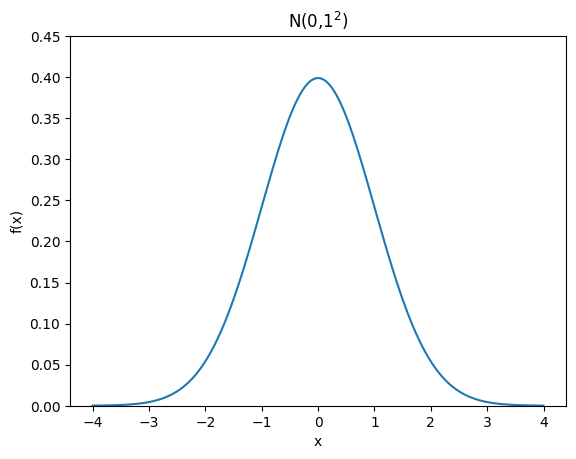

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001) #generar valores de x
ax.set_title('N(0,$1^2$)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45)
plt.show()

### 2.2.5 Función de distribución acumulativa de una normal $N(\mu,\sigma^2)$.

A la probabilidad

$$\text{cdf}(x):=P(X\leq x)$$ se llama la distribución acumulativa (hasta el valor $x$) de $f(x)$.

Es decir,
$$P(a\leq X\leq b)=\text{cdf}(b)-\text{cdf}(a)$$
y
$$\text{sf}(a):=P(X>a)=1-\text{cdf}(a).$$

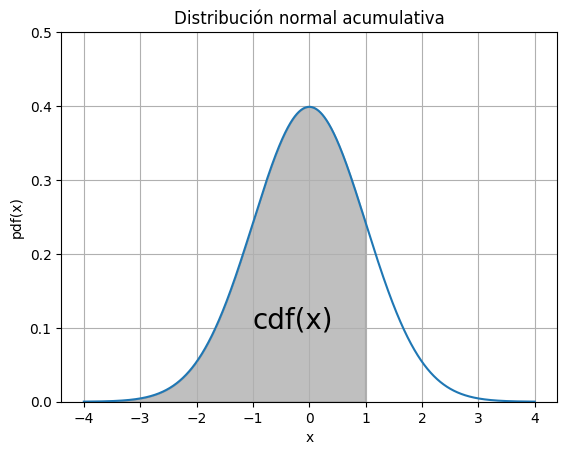

In [26]:
from scipy.stats import norm
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Distribución normal acumulativa")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='grey')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()

**Ejemplo:**

Si $Z\sim N(0,1)$, encuentra $\mathbb{P}(-1.93 < Z < 1.93)$. La probabilidad buscada es:


In [21]:
norm(0,1).cdf(1.93)-norm(0,1).cdf(-1.93)

np.float64(0.9463931622458901)

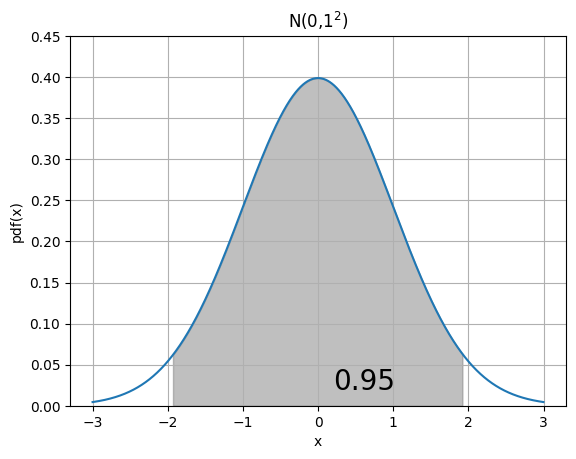

In [25]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-3,3,0.001)
ax.plot(x, norm.pdf(x,loc=0,scale=1))
ax.set_title("N(0,$1^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(-1.93,1.93,0.01)
ax.set_ylim(0,0.45)
ax.fill_between(px,norm.pdf(px,loc=0,scale=1),alpha=0.5, color='grey')
pro=norm(0, 1).cdf(1.93) - norm(0,1).cdf(-1.93)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

### 2.2.6 Variable aleatoria Gamma con parámetros $\alpha$ y $\lambda$.

La distribución gamma se obtiene al considerar el tiempo que transcurre entre cierto número de ocurrencias de eventos que ocurren aleatoriamente en el tiempo

La función gamma $\Gamma:(0,\infty)\to \mathbb{R}$ está definida como
	$$\Gamma(\alpha)=\int_{0}^{\infty}t^{\alpha-1}e^{-t}dt.$$



**Propiedades de la función gamma**
- $\Gamma(\alpha)<\infty$ para cualquier $\alpha>0$.
- $\Gamma(\alpha+1)=\alpha\Gamma(\alpha)$.
- Si $n\geq 1$ $\Gamma(n)=(n-1)!$
- $\Gamma\left(\frac{1}{2} \right)=\sqrt{\pi}$.



 Si $\alpha$ y $\lambda$ son reales positivos, decimos que una variable aleatoria $X$ tiene distribución gamma con parámetros $\alpha$ y $\lambda$ si tiene por función de densidad:
	$$\displaystyle f_{X}(x)=\begin{cases}
	\displaystyle \frac{\lambda^{\alpha}x^{\alpha-1}e^{-\lambda x} }{\Gamma(\alpha)} & x>0\\
	0 & \text{en otro caso}
	\end{cases}$$
En esta caso, escribimos la información anterior como $X\sim \Gamma(\alpha,\lambda) $

**Nota:**

Si $X\sim N(0,1)$, entonces $X^{2}\sim \Gamma\left(\frac{1}{2}, \frac{1}{2} \right)$.
En efecto, Para $z>0$, se tiene:
	$$F_{X^{2}}(z)=\mathbb{P}(X^2\leq z)=\mathbb{P}(-\sqrt{z}\leq X\leq \sqrt{z})=F_{X}(\sqrt{z})-F_{X}(-\sqrt{z}).$$
Por lo tanto,
$$f_{X^2}(z)=\frac{d F_{X^{2}}(z)}{dz}=\frac{1}{2\sqrt{z}}f_{X}(\sqrt{z})+\frac{1}{2\sqrt{z}}f_{X}(-\sqrt{z})=\frac{1}{\sqrt{z}}f_{X}(z).$$
Ahora,
$$f_{X}(\sqrt{z})=\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}z}.$$

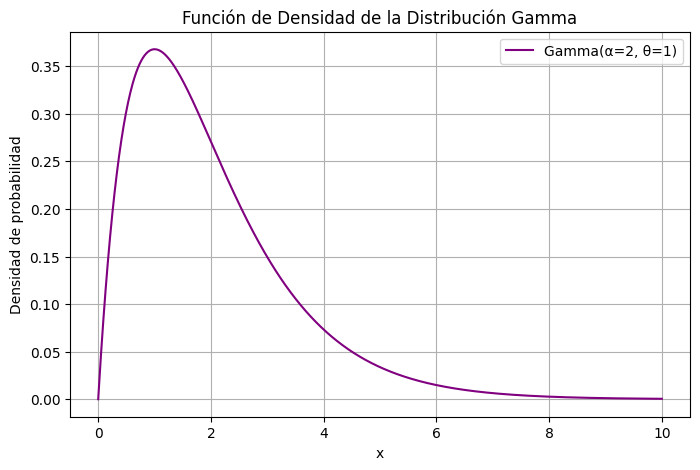

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Parámetros de la distribución Gamma
shape_param = 2  # Parámetro de forma (k o α)
scale_param = 1  # Parámetro de escala (θ)

# Generar valores de x
x = np.linspace(0, 10, 1000)

# Calcular la PDF de la distribución Gamma
gamma_pdf = gamma.pdf(x, a=shape_param, scale=scale_param)

# Graficar la PDF de la distribución Gamma
plt.figure(figsize=(8, 5))
plt.plot(x, gamma_pdf, label=f'Gamma(α={shape_param}, θ={scale_param})', color='purple')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')
plt.title('Función de Densidad de la Distribución Gamma')
plt.grid(True)
plt.legend()
plt.show()

## 2.3 Simulación de Variables Aleatorias

**Métodos para generar variables aleatorias utilizados en simulación computacional**.

Se abordan distribuciones uniformes, exponenciales, normales, binomiales y Poisson, entre otras, así como técnicas como la transformada inversa y el método del rechazo.

**Ejemplos comunes en simulación:**
- Tiempo entre llegada de cada persona  
- Número de personas por minuto  
- Número de artículos por persona  
- Cantidad de dinero ganado cada hora  
- Tiempo de atención por cliente  
- Número de veces que la cajera solicita ayuda durante la jornada  
- Cantidad de gente que está formada  
- Número de personas que pagan con tarjeta

### Métodos de generación de números aleatorios rectangulares

La generación de variables aleatorias con esta distribución es importante porque las variables que tengan una distribución diferente, tendrán que usar a ésta como base.

- Cada posible resultado entre $a$ y $b$ tiene la misma probabilidad $1/n$.

Las variables generadas deben cumplir con:
- Los valores generados deben ser independientes y estar idénticamente distribuidos
- La secuencia generada debe ser lo más larga posible y ser reproducibles
- Debe permitir generar múltiples secuencias
- Que usen poca memoria

Históricamente se han usado cuatro tipos de métodos para generar sucesiones de números rectangulares:
- Métodos manuales
- Tablas de biblioteca
- Computación analógica
- Computación digital

### 2.3.1 Generación Pseeudoaleatoria

La generación de los números aleatorios rectangulares debe realizarse a través de relaciones matemáticas de recurrencia. Por esta razón se consideran **pseudoaleatorios**, ya que el proceso para generarlos es determinístico.

Hay dos métodos que son los más utilizados para la generación. Ambos se basan en la siguiente definición:

**Definición.** Dos enteros $a$ y $b$ son congruentes módulo $m$ si su diferencia es un múltiplo entero de $m$ y se expresa como
$$𝑎 \equiv 𝑏 ( \text{𝑚o𝑑 } 𝑚)$$
Como consecuencia:
- $(a-b)$ es divisible entre $m$
- $a$ y $b$ dan el mismo residuo al ser divididos entre $m$

### 2.3.2 Método congruencial multiplicativos

Generar una secuencia de números pseudoaleatorios uniformes en el intervalo (0, 1) usando la siguiente fórmula recursiva:

$$n_{i+1} = a n_i \mod m$$
- $m$ debe ser tan grande como sea posible, dependiendo de los bits por palabra que maneje la computadora, descontando el bit del signo ($b$). Por lo tanto: $m = 2^b$
- $a$ debe satisfacer que $a \approx 2^{(b+1)/2}$ y que $a \equiv \pm 3 \mod 8$. La segunda expresión equivale a $( a-(\pm3 ) )$ es múltiplo de $8$.
- $n_0$: entero positivo impar menor a $m$
- El periodo será de longitud: $m/4$

In [28]:
# n0 : valor inicial o semilla
# a : multiplicador
# m : modulo (2^b)
# n : el número de numeros que quiero generar

def multiplicativo(n0,a,m,n):
    secuencia = []
    ni = n0 # iniciar con una semilla
    for _ in range(n):
        ni = (a * ni) % m # calculo el sig numero utilizando la formula recurrente
        secuencia.append(ni/m) # normaliza entre 0 y 1
    return secuencia

In [29]:
m = 2**31
a = 65539 # a ≡  +-3 mod 8
n0 = 12345
n=10

secuencia_mult = multiplicativo(n0,a,m,n)
print(secuencia_mult)

[0.37675674771890044, 0.2604887490160763, 0.17212176462635398, 0.6883318466134369, 0.5808951980434358, 0.29038456873968244, 0.5142506300471723, 0.4720426616258919, 0.20400029933080077, 0.9756178413517773]


In [30]:
import numpy as np
import plotly.graph_objects as go # Para gráficos interactivos

# Generamos ambas secuencias
secuencia_mult = multiplicativo(n0,a,m,n)
secuencia_numpy = np.random.uniform(0,1,n)

# figura con Plotly
fig = go.Figure()

# Añadir los histogramas
fig.add_trace(go.Histogram(
    x=secuencia_mult,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Método multiplicativo',
    marker_color='red'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Numpy random uniform',
    marker_color='blue'
))

fig.update_layout(
    barmode='overlay', #superpone los histogramas
    title = 'Compararación: Método multiplicativo -vs- Numpy',
    xaxis_title='valor generado',
    yaxis_title='Frecuencia',
    legend_title='Método',
    bargap=0.05
)

fig.show()

### 2.3.3 Método congruencial mixto

Este método genera números pseudoaleatorios con la fórmula:
$$n_{i+1} = (a n_i + c) \mod m$$

**Obs.** Se le llama “mixto” porque incluye una constante adicional $c$ (a diferencia del método multiplicativo).

- $m = 2^b$
- $a \approx 2^{(b-1)/2}$, $a \equiv 1 \mod 4$
- $c$, $n_0$: enteros positivos impares $< m$
- Periodo: $m$

In [31]:
# n0 : valor inicial o semilla
# a : multiplicador
# c : deber ser impar
# m : modulo (2^b)
# n : el número de numeros que quiero generar

def mixto(n0,a,c,m,n):
    secuencia = []
    ni = n0 # iniciar con una semilla
    for _ in range(n):
        ni = (a * ni + c) % m # calculo el sig numero utilizando la formula recurrente
        secuencia.append(ni/m) # normaliza entre 0 y 1
    return secuencia

In [32]:
m = 2**31
a = 1103515245 # a cong 1 mod----
c = 12345
n0 = 42
n= 10

secuencia_mixto = mixto(n0,a,c,m,n)
print(secuencia_mixto)

[0.5823075897060335, 0.5198187492787838, 0.46597642498090863, 0.7770372582599521, 0.42286502895876765, 0.03337232954800129, 0.41738913068547845, 0.8087285170331597, 0.6123396842740476, 0.7149040475487709]


In [33]:
# Generamos ambas secuencias
secuencia_mixto = mixto(n0,a,c,m,n)
secuencia_numpy = np.random.uniform(0,1,n)

# figura con Plotly
fig = go.Figure()

# Añadir los histogramas
fig.add_trace(go.Histogram(
    x=secuencia_mixto,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Método mixto',
    marker_color='red'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx = 40,
    opacity = 0.6,
    name = 'Numpy random uniform',
    marker_color='blue'
))

fig.update_layout(
    barmode='overlay', #superpone los histogramas
    title = 'Compararación: Método mixto -vs- Numpy',
    xaxis_title='valor generado',
    yaxis_title='Frecuencia',
    legend_title='Método',
    bargap=0.05
)

fig.show()

In [34]:
import random
n = 1000

# Generar secuencia usando random.random()
secuencia_random = [random.random() for _ in range(n)]

# Generar secuencia usando numpy
secuencia_numpy = np.random.uniform(0, 1, n)

# Graficar histogramas
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=secuencia_random,
    nbinsx=40,
    opacity=0.6,
    name='random.random()',
    marker_color='crimson'
))

fig.add_trace(go.Histogram(
    x=secuencia_numpy,
    nbinsx=40,
    opacity=0.6,
    name='numpy.random.uniform',
    marker_color='royalblue'
))

fig.update_layout(
    barmode='overlay',
    title='Comparación: random.random() vs numpy.random.uniform',
    xaxis_title='Valor generado',
    yaxis_title='Frecuencia',
    legend_title='Método',
    bargap=0.05
)

fig.show()

### Métodos de generación de números aleatorios no rectangulares

### 2.3.4 Método de la transformada inversa


El método utiliza la función de distribución $F(x)$ de la distribución que se va a simular
$$F(x) = \int_{-\infty}^{x} f(t)\,dt$$

Como se sabe, los valores de $F(x)$ están en el intervalo $(0,1)$ al igual que los números rectangulares $U$.

El método genera un $U$ y trata de determinar el valor de la variable aleatoria para la cual $F(x)$ sea igual a $U$.

Si $U \in (0,1)$:
$$ F(x) = U \quad \Rightarrow \quad x = F^{-1}(U)$$

$\mathbf{Teorema}.$ Sea $X$ una variable aleatoria real. Supongamos que su función de distribución $F$ es estrictamente creciente (por lo que $F$ es una biyección de $\mathbb{R}$ sobre $(0,1)$ y podemos denotar por $F^{-1}$ a su inversa). Sea $U\sim \text{unif}[0,1]$. Entonces $F^{-1}(U)$ tiene la misma ley que $X$.

Si $F$ no es estrictamente creciente, hemos visto que el teorema precedente sigue siendo válido bajo la condición de definir
$$F^{-1}(u)=\inf\{ x\in \mathbb{R} : F(x)\geq u\},$$
la inversa generalizada de $F$.

In [35]:
# Vamos a simular una v.a. Bernoulli usando una Uniforme
import random
def bernoulli(p):
    u = random.random() # U -> Unif(0,1)
    return 1 if u <= p else 0

In [36]:
# Simulamos n valores con p de éxito
p = 0.5
simulaciones = [bernoulli(p) for _ in range(100)]
print(simulaciones)

[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]


In [37]:
sum(simulaciones)

49

**Ejemplo**: Distribución exponencial

sea $\theta,\lambda>0$, entonces a través del teorema se puede generar una v.a. exponencial.

Sea $U \sim Unif[0,1]$, entonces si $X\sim Exp(\lambda)$, entonces

$$f_{X}(x) = \lambda e^{-\lambda x}$$
y que
$$ F_X(x) = 1-e^{-\lambda x} $$

Sabemos que $1-e^{-\lambda x} = U$, entonces $1-U = e^{-\lambda x}$, y tomando logaritmo, se tiene que
$ \ln(1-U) = -\lambda x$ y como $U$ es uniforme entonces $U \sim 1-U$, por lo que depejando a $x$, se tiene que
$$ X = -\frac{\ln(U)}{\lambda} \sim Exp(\lambda) $$

**Ejemplo:** Distribución Uniforme Continua
$$f(x) = \frac{1}{b-a}, \quad a \leq x \leq b$$
$$F(x) = \frac{x-a}{b-a} = U \Rightarrow x = a + (b-a)U$$

In [38]:
import numpy as np
import plotly.graph_objects as go

# Semilla
np.random.seed(123)

# Parámetro de la exponencial
lambd = 4
n = 10000

# Simulación usando transformada inversa
uniformes = np.random.random(n)
exponenciales = -np.log(uniformes) / lambd

# Curva teórica
x_vals = np.linspace(0, exponenciales.max(), 300)
y_vals = lambd * np.exp(-lambd * x_vals)

# Gráfico
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=exponenciales,
    nbinsx=40,
    histnorm='probability density',
    marker_color='skyblue',
    name='Simulación'
))

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='darkblue')
))

fig.update_layout(
    title='Distribución Exponencial simulada vs teórica (λ = 1)',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()

In [39]:
# Parámetros de la uniforme
a, b = 2, 5
n = 10000

# Simulación por transformación lineal
uniformes = np.random.random(n)
uniforme_continua = a + (b - a) * uniformes

# Densidad teórica (constante)
x_vals = np.linspace(a, b, 300)
y_vals = np.ones_like(x_vals) * (1 / (b - a))

# Gráfico
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=uniforme_continua,
    nbinsx=40,
    histnorm='probability density',
    marker_color='orange',
    name='Simulación'
))

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='red')
))

fig.update_layout(
    title='Distribución Uniforme Continua simulada vs teórica [2, 5]',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()

**Ejercicio:** (Variable aleatoria Cauchy) Simulemos la variable aleatoria de Cauchy de parámetro $1$ que tiene por función de densidad
$$\frac{1}{\pi}\frac{1}{1+x^{2}}.$$


- Corroborar que la función así definida es una función de densidad de probabilidad
- Encontrar F_X
- Crear una gráfica en Python que muestre su forma
- Generar v.a. Cauchy a partir de una uniforme

Por el teorema anterior, para $u\in (0,1)$
$$u=\frac{1}{\pi}\arctan(x)+\frac{1}{2} \qquad \text{si y sólo si} \qquad x=\tan\left({\pi}\left(u-\frac{1}{2} \right) \right).$$

In [40]:
import numpy as np
import plotly.graph_objects as go
# Semilla
np.random.seed(123)
# 1. Parámetros
n = 10000

In [41]:
uniformes = np.random.random(n)
cauchy_simulada = np.tan(np.pi * (uniformes - 0.5))
def f_cauchy(x):
    return (1 / np.pi) * (1 / (1 + x**2))
x_vals = np.linspace(-10, 10, 500)
y_vals = f_cauchy(x_vals)
#Crear gráfico interactivo con Plotly
fig = go.Figure()
fig.add_trace(go.Histogram(
    x=cauchy_simulada,
    nbinsx=100,
    histnorm='probability density',
    marker_color='blue',
    name='Simulación'
))

In [42]:
fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='lines',
    name='Densidad teórica',
    line=dict(color='red')
))

fig.update_layout(
    title='Distribución Cauchy simulada vs teórica',
    xaxis_title='x',
    yaxis_title='Densidad',
    bargap=0.05
)

fig.show()

## 2.4 Función Generadora de Momentos

Es una herramienta que permite obtener de forma sistemática los momentos (esperanza, varianza, curtosis, etc.) de una variable aleatoria, ya sea discreta o continua.

La función generadora de momentos de una variable aleatoria $X$, denotada por $M_X(t)$, se define como la esperanza de $e^{tX}$, donde $t$ es un parámetro real. Es decir:

$$M_X(t) = E[e^{tX}]$$

Nos permite calcular los momentos de cualquier orden simplemente derivando la FGM respecto a t y evaluando en $t=0$

* **Primer momento (esperanza)**:
$$E[X]=M'_X(0)$$
* **Segundo momento:**
$$E[X^2]=M''_X(0)$$

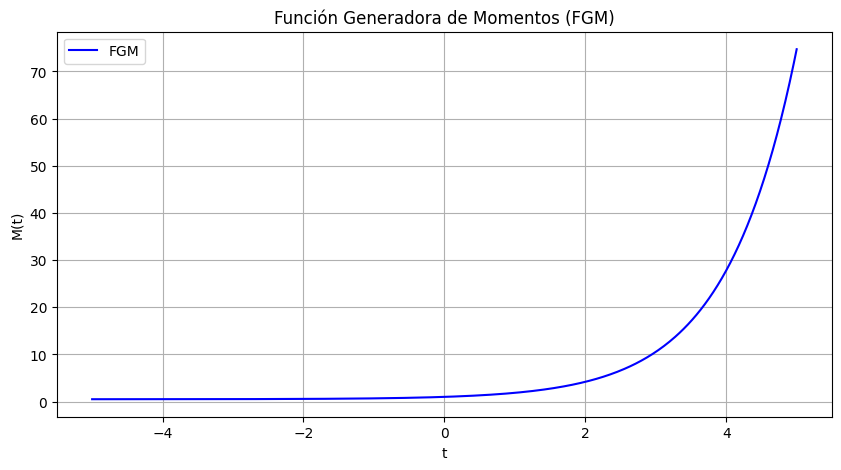

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los valores y sus probabilidades
valores = np.array([0, 1])
probabilidades = np.array([0.5, 0.5])

# Definir los valores de t
t = np.linspace(-5, 5, 500)

# Definir la función generadora de momentos
def fgm(t):
    return np.sum(probabilidades * np.exp(t[:, None] * valores), axis=1)

# Calcular los valores de la FGM
fgm_vals = fgm(t)

# Graficar la FGM
plt.figure(figsize=(10,5))
plt.plot(t, fgm_vals, color='blue', label='FGM')
plt.title("Función Generadora de Momentos (FGM)")
plt.xlabel('t')
plt.ylabel('M(t)')
plt.grid(True)
plt.legend()
plt.show()

## 2.5 Función Característica

La Función Característica (FC) de una variable aleatoria es otra forma de describir completamente su distribución de probabilidad, similar a la función generadora de momentos (FGM), pero usando números complejos.

La función característica de una variable aleatoria $X$, denotada por $\phi_X(t)$, se define como la esperanza de $e^{itX}$, donde $t$ es un parámetro real e $i$ es la unidad imaginaria ($i^2 = -1$). Es decir:

$$\phi_X(t) = E[e^{itX}]$$


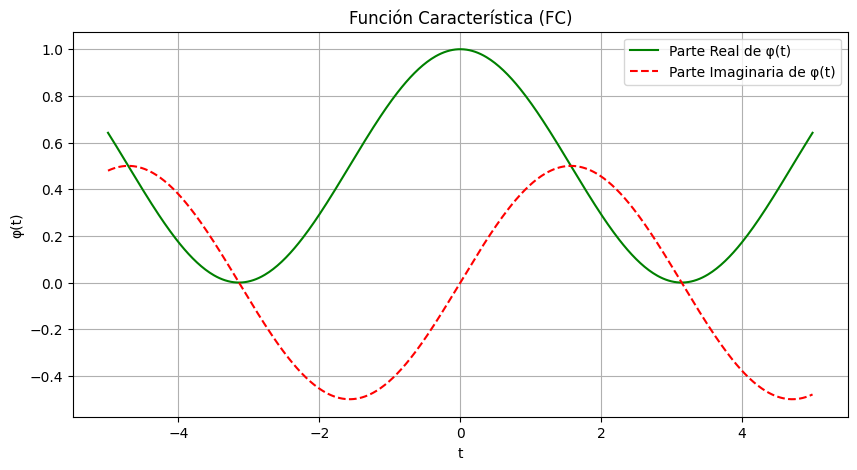

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los valores y sus probabilidades
valores = np.array([0, 1])
probabilidades = np.array([0.5, 0.5])

# Definir los valores de t
t = np.linspace(-5, 5, 500)

# Definir la función característica
def fc(t):
    return np.sum(probabilidades * np.exp(1j * t[:, None] * valores), axis=1)

# Calcular los valores de la FC
fc_vals = fc(t)

# Graficar la parte real e imaginaria de la FC
plt.figure(figsize=(10,5))
plt.plot(t, fc_vals.real, color='green', label='Parte Real de φ(t)')
plt.plot(t, fc_vals.imag, color='red', linestyle='--', label='Parte Imaginaria de φ(t)')
plt.title("Función Característica (FC)")
plt.xlabel('t')
plt.ylabel('φ(t)')
plt.grid(True)
plt.legend()
plt.show()

## 2.6 Ley de los Grandes Números

Es un teorema fundamental, el cual nos dice que cuando repetimos un experimento aleatorio muchas veces, el promedio de los resultados obtenidos tiende a acercarse al valor esperado (esperanza matemática) de la variable aleatoria.

Sea $X_1,X_2,\dots,X_n$ una sucesión de variables aleatorias independientes e idénticamente distribuidas con un valor esperado $\mu$

Entonces:
$$\lim_{x\to ∞}\frac{1}{n}\sum_{i=1}^{n}X_i=\mu$$
Con probabilidad 1

**Simulación de la LGN:**

Simualaremos los lanzamientos de un dado y calcularemos la media

$$ \Omega = \{ 1,2,3,4,5,6, \}$$

La media teórica : $$\mathbb{E}[X] = 3.5$$

In [46]:
import numpy as np
import pandas as pd #Manejo y manipulacion de datos
import matplotlib.pyplot as plt
import seaborn as sns #Visualizacion de datos

In [47]:
np.random.seed(42) # numeros pseudoaletorios sean reproducibles
lanzamientos = np.random.randint(1,7,10000)

In [48]:
media_acum = np.cumsum(lanzamientos) / np.arange(1,10001)
df = pd.DataFrame( {
    'Lanzamiento': np.arange(1,10001),
    'Media Acumulada': media_acum } )

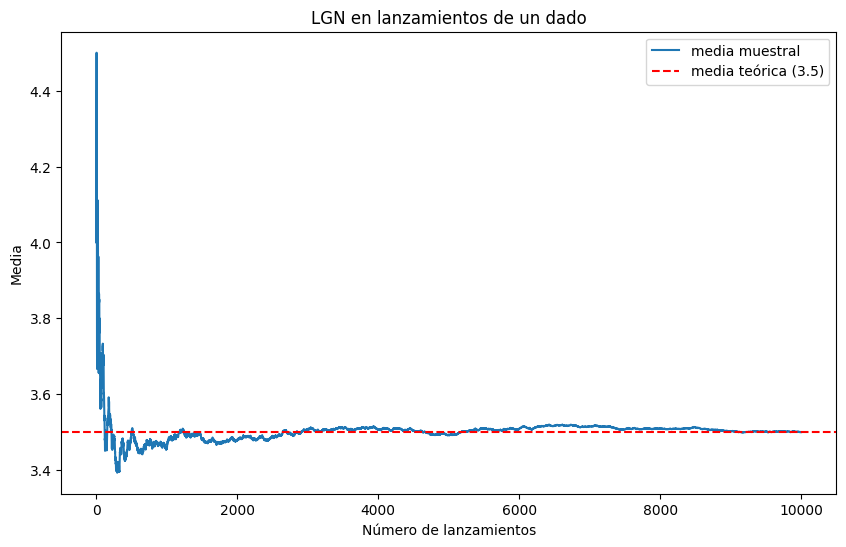

In [49]:
plt.figure(figsize=(10,6))
plt.plot(df['Lanzamiento'], df['Media Acumulada'], label='media muestral')
plt.axhline(3.5, color= 'red', linestyle='--', label='media teórica (3.5)')
plt.xlabel('Número de lanzamientos')
plt.ylabel('Media')
plt.title('LGN en lanzamientos de un dado')
plt.legend()
plt.show()

**Problema de la Aguja de Bufon:**

Estimación de pi: 3.14896162990254


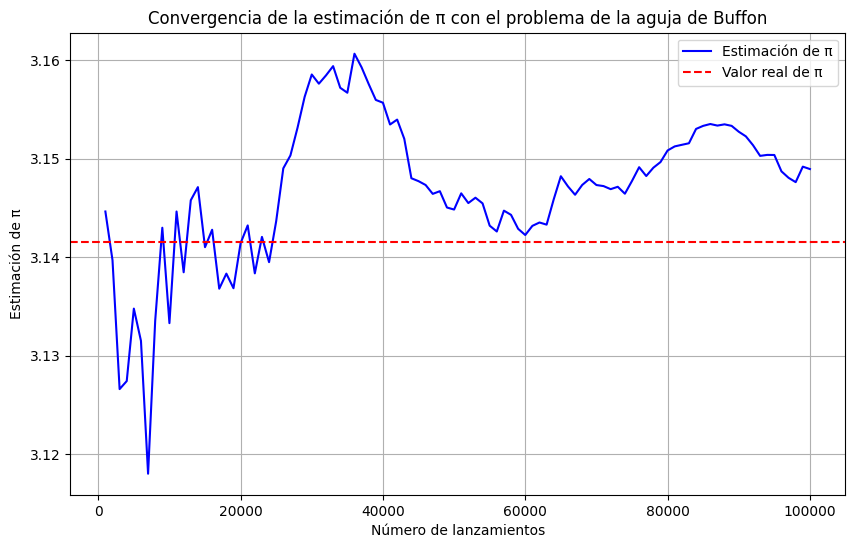

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
L = 1.0  # Longitud de la aguja
d = 1.0  # Distancia entre las líneas paralelas
num_trials = 100000  # Número total de lanzamientos
step = 1000  # Número de lanzamientos por paso para la estimación de pi

# Listas para almacenar los valores de pi estimados y los lanzamientos
pi_estimates = []
trial_steps = []

# Contador para cuántas agujas cruzan una línea
crossed_lines = 0

# Simulación de lanzamientos de la aguja y estimación de pi en pasos
for trial in range(1, num_trials + 1):
    # Posición del centro de la aguja
    center_position = np.random.uniform(0, d / 2)

    # Ángulo aleatorio entre 0 y pi (ángulo en radianes)
    angle = np.random.uniform(0, np.pi)

    # Distancia desde el centro de la aguja hasta la línea más cercana
    distance_to_nearest_line = L / 2 * np.sin(angle)

    # Verificamos si la aguja cruza una línea
    if center_position <= distance_to_nearest_line:
        crossed_lines += 1

    # Estimación de pi en pasos
    if trial % step == 0 and crossed_lines > 0:
        pi_estimate = (2 * L * trial) / (crossed_lines * d)
        pi_estimates.append(pi_estimate)
        trial_steps.append(trial)

print(f"Estimación de pi: {pi_estimate}")

# Plot de la estimación de pi a lo largo de los lanzamientos
plt.figure(figsize=(10, 6))
plt.plot(trial_steps, pi_estimates, label="Estimación de π", color="blue")
plt.axhline(y=np.pi, color="red", linestyle="--", label="Valor real de π")
plt.xlabel('Número de lanzamientos')
plt.ylabel('Estimación de π')
plt.title('Convergencia de la estimación de π con el problema de la aguja de Buffon')
plt.legend()
plt.grid(True)
plt.show()

## 2.7 Teorema del Límite Central


El Teorema del Límite Central (TCL)  establece que la distribución de la suma, o el promedio de una gran cantidad de variables aleatorias independientes e idénticamente distribuidas, independientemente de la forma de la distribución original de estas variables, tenderá a una distribución normal a medida que aumenta el número de variables.


Sean $X_1, X_2, ..., X_n$ una secuencia de $n$ variables aleatorias independientes e idénticamente distribuidas con media $\mu$ y varianza finita $\sigma^2$. Sea $S_n$ la suma de estas variables:

$$S_n = X_1 + X_2 + ... + X_n$$

Entonces, a medida que $n$ tiende a infinito, la distribución de la variable aleatoria estandarizada:

$$Z_n = \frac{S_n - n\mu}{\sigma \sqrt{n}} = \frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}}$$

donde $\bar{X}_n = S_n / n$ es la media muestral, converge en distribución a una distribución normal estándar con media 0 y varianza 1, denotada como $N(0, 1)$.

**Aplicación del TCL:**

<ipython-input-51-dbda25c73d9a>:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




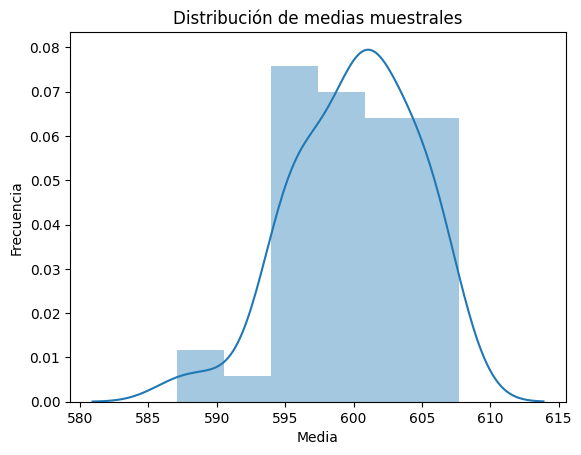

In [51]:
# Crear el DataFrame con 50 muestras, cada una con 10 observaciones de una binomial(n=1000, p=0.6)
df = pd.DataFrame()

for i in range(1,51):
  muestra = np.random.binomial(1000,0.6,10)  # Muestra aleatoria de binomiales de 10 éxitos, se realiza 1000 veces el experimento
  col = f"muestra {i}"
  df[col] = muestra

df.head(5)  # Mostrar las primeras 5 filas

# Calcular el promedio de cada muestra
df_muestra_medias = pd.DataFrame(df.mean(), columns=["Media de la muestra"])

# Visualizar la distribución de las medias
sns.distplot(df_muestra_medias)
#sns.histplot(df_muestra_medias["Media de la muestra"], kde=True)
plt.title("Distribución de medias muestrales")
plt.xlabel("Media")
plt.ylabel("Frecuencia")
plt.show()